<a href="https://colab.research.google.com/github/SanikaTelalwar/house-price-ml-project/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U xgboost


In [2]:
!pip install --upgrade xgboost


Upload Dataset to Google Colab

In [3]:
from google.colab import files

# Upload train.csv and test.csv that you downloaded from Kaggle
uploaded = files.upload()


Saving test.csv to test (2).csv
Saving train.csv to train (3).csv


Import Required Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics


Load the Data

In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print("✅ Train data shape:", train_data.shape)
print("✅ Test data shape:", test_data.shape)
train_data.head()


✅ Train data shape: (1460, 81)
✅ Test data shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Check Missing Values

In [6]:
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:\n", missing_values)


Columns with Missing Values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Handle Missing Values

In [7]:
# Fill missing numeric values with median
for col in train_data.select_dtypes(include=[np.number]).columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)

# Fill missing categorical values with mode
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Apply same method to test_data
for col in test_data.select_dtypes(include=[np.number]).columns:
    test_data[col].fillna(test_data[col].median(), inplace=True)
for col in test_data.select_dtypes(include=['object']).columns:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


/tmp/ipython-input-1733082507.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)
/tmp/ipython-input-1733082507.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Convert Categorical Data to Numeric

In [8]:
# Label encode all object columns
label_encoder = LabelEncoder()
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])

for col in test_data.select_dtypes(include=['object']).columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])


Separate Features (X) and Target (Y)

In [9]:
X = train_data.drop(['SalePrice', 'Id'], axis=1)
Y = train_data['SalePrice']

print("✅ Features shape:", X.shape)
print("✅ Target shape:", Y.shape)


✅ Features shape: (1460, 79)
✅ Target shape: (1460,)


Train/Test Split

In [10]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training shape:", X_train.shape)
print("Validation shape:", X_valid.shape)


Training shape: (1168, 79)
Validation shape: (292, 79)


Train XGBoost Model

In [13]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=42)

model.fit(
    X_train, Y_train,
    verbose=False
)

print("✅ Model training completed!")

✅ Model training completed!


Model Evaluation

In [14]:
# Predictions on validation data
y_pred = model.predict(X_valid)

# R² and MAE
r2 = metrics.r2_score(Y_valid, y_pred)
mae = metrics.mean_absolute_error(Y_valid, y_pred)

print("R² Score:", round(r2, 4))
print("Mean Absolute Error:", round(mae, 4))


R² Score: 0.9194
Mean Absolute Error: 16181.3525


Visualize Actual vs Predicted

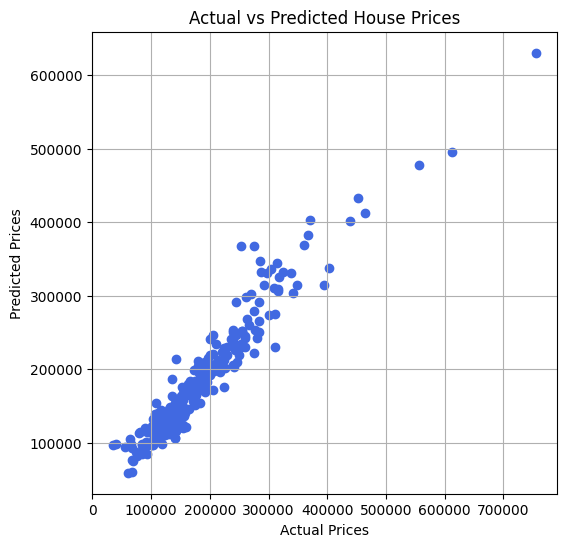

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(Y_valid, y_pred, color='royalblue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


Predict on Test Data (for Submission)

In [16]:
# Drop Id before prediction
X_test = test_data.drop(['Id'], axis=1)
predictions = model.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': predictions
})

submission.head()


,Id,SalePrice
0,1461,128650.289062
1,1462,156632.281250
2,1463,181577.500000
3,1464,190528.546875
4,1465,198909.593750


Save Predictions as CSV

In [17]:
submission.to_csv('submission.csv', index=False)
print("✅ Submission file created successfully!")

# Download to your system
from google.colab import files
files.download('submission.csv')


✅ Submission file created successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
readme_text = """
# House Price Prediction

## Project Title
House Price Prediction using XGBoost (Kaggle - House Prices: Advanced Regression Techniques)

## Members Information
Name : Sanika Telalwar
Reg No. : 2023BIT065

## Project Description
This project predicts house sale prices using the Kaggle 'House Prices' dataset. Data preprocessing includes handling missing values and encoding categorical features. Model used: XGBoost Regressor. Evaluation metrics: R², MSE, RMSE, MAE.

## How to run
1. Upload `train.csv` and `test.csv` to the Colab environment.
2. Run all notebook cells in order.
3. Output: `submission.csv` (predicted SalePrice for test set), `house_price_xgb_model.pkl`.

## Results (fill with your results)
- R² Score (Validation): ...
- MSE: ...
- RMSE: ...
- MAE: ...

## Files included
- house_price_prediction.ipynb
- submission.csv
- house_price_xgb_model.pkl
"""

with open('README.md', 'w') as f:
    f.write(readme_text)

# Download README
from google.colab import files
files.download('README.md')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>